In [13]:
import pandas as pd

# Membaca file iris.csv
iris = pd.read_csv('sample_data/Iris.csv')

In [14]:
# Melihat informasi dataset
iris.info()

# melihat informasi dataset pada 5 baris pertama
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
# menghilangkan kolom yang tidak penting
iris.drop('Id',axis=1,inplace=True)

In [16]:
# melihat informasi dataset pada 5 baris pertama
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
# memisahkan atribut dan label
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = iris['Species']

# Membagi dataset menjadi data latih & data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [18]:
from sklearn.tree import DecisionTreeClassifier

# membuat model Decision Tree
tree_model = DecisionTreeClassifier() 

# Melatih model dengan menggunakan data latih
tree_model = tree_model.fit(X_train, y_train)

In [19]:
# Evaluasi Model
from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(X_test)

print("Hasil prediksi : ")
for pred in y_pred: print(pred)
print("\n")
print("Hasil Test :")
for test in y_test: print(test)

acc_secore = round(accuracy_score(y_pred, y_test), 3)

print('Accuracy: ', acc_secore)

Hasil prediksi : 
Iris-virginica
Iris-virginica
Iris-virginica
Iris-versicolor
Iris-setosa
Iris-virginica
Iris-versicolor
Iris-setosa
Iris-setosa
Iris-versicolor
Iris-virginica
Iris-setosa
Iris-versicolor
Iris-virginica
Iris-virginica


Hasil Test :
Iris-versicolor
Iris-virginica
Iris-virginica
Iris-versicolor
Iris-setosa
Iris-virginica
Iris-versicolor
Iris-setosa
Iris-setosa
Iris-versicolor
Iris-virginica
Iris-setosa
Iris-versicolor
Iris-virginica
Iris-virginica
Accuracy:  0.933


In [20]:
# prediksi model dengan tree_model.predict([[SepalLength, SepalWidth, PetalLength, PetalWidth]])
print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]])[0])

Iris-virginica


/home/yelf/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [26]:
import os
os.mkdir('model/') if not os.path.exists("model/") else print("Folder is exists")

Folder is exists


In [22]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model, 
    out_file='model/tree.dot', 
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded = True, proportion = False, 
    precision = 2, filled = True
)

In [23]:
# Convert dot to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'model/tree.dot', '-o', 'model/tree.png', '-Gdpi=600'])

0

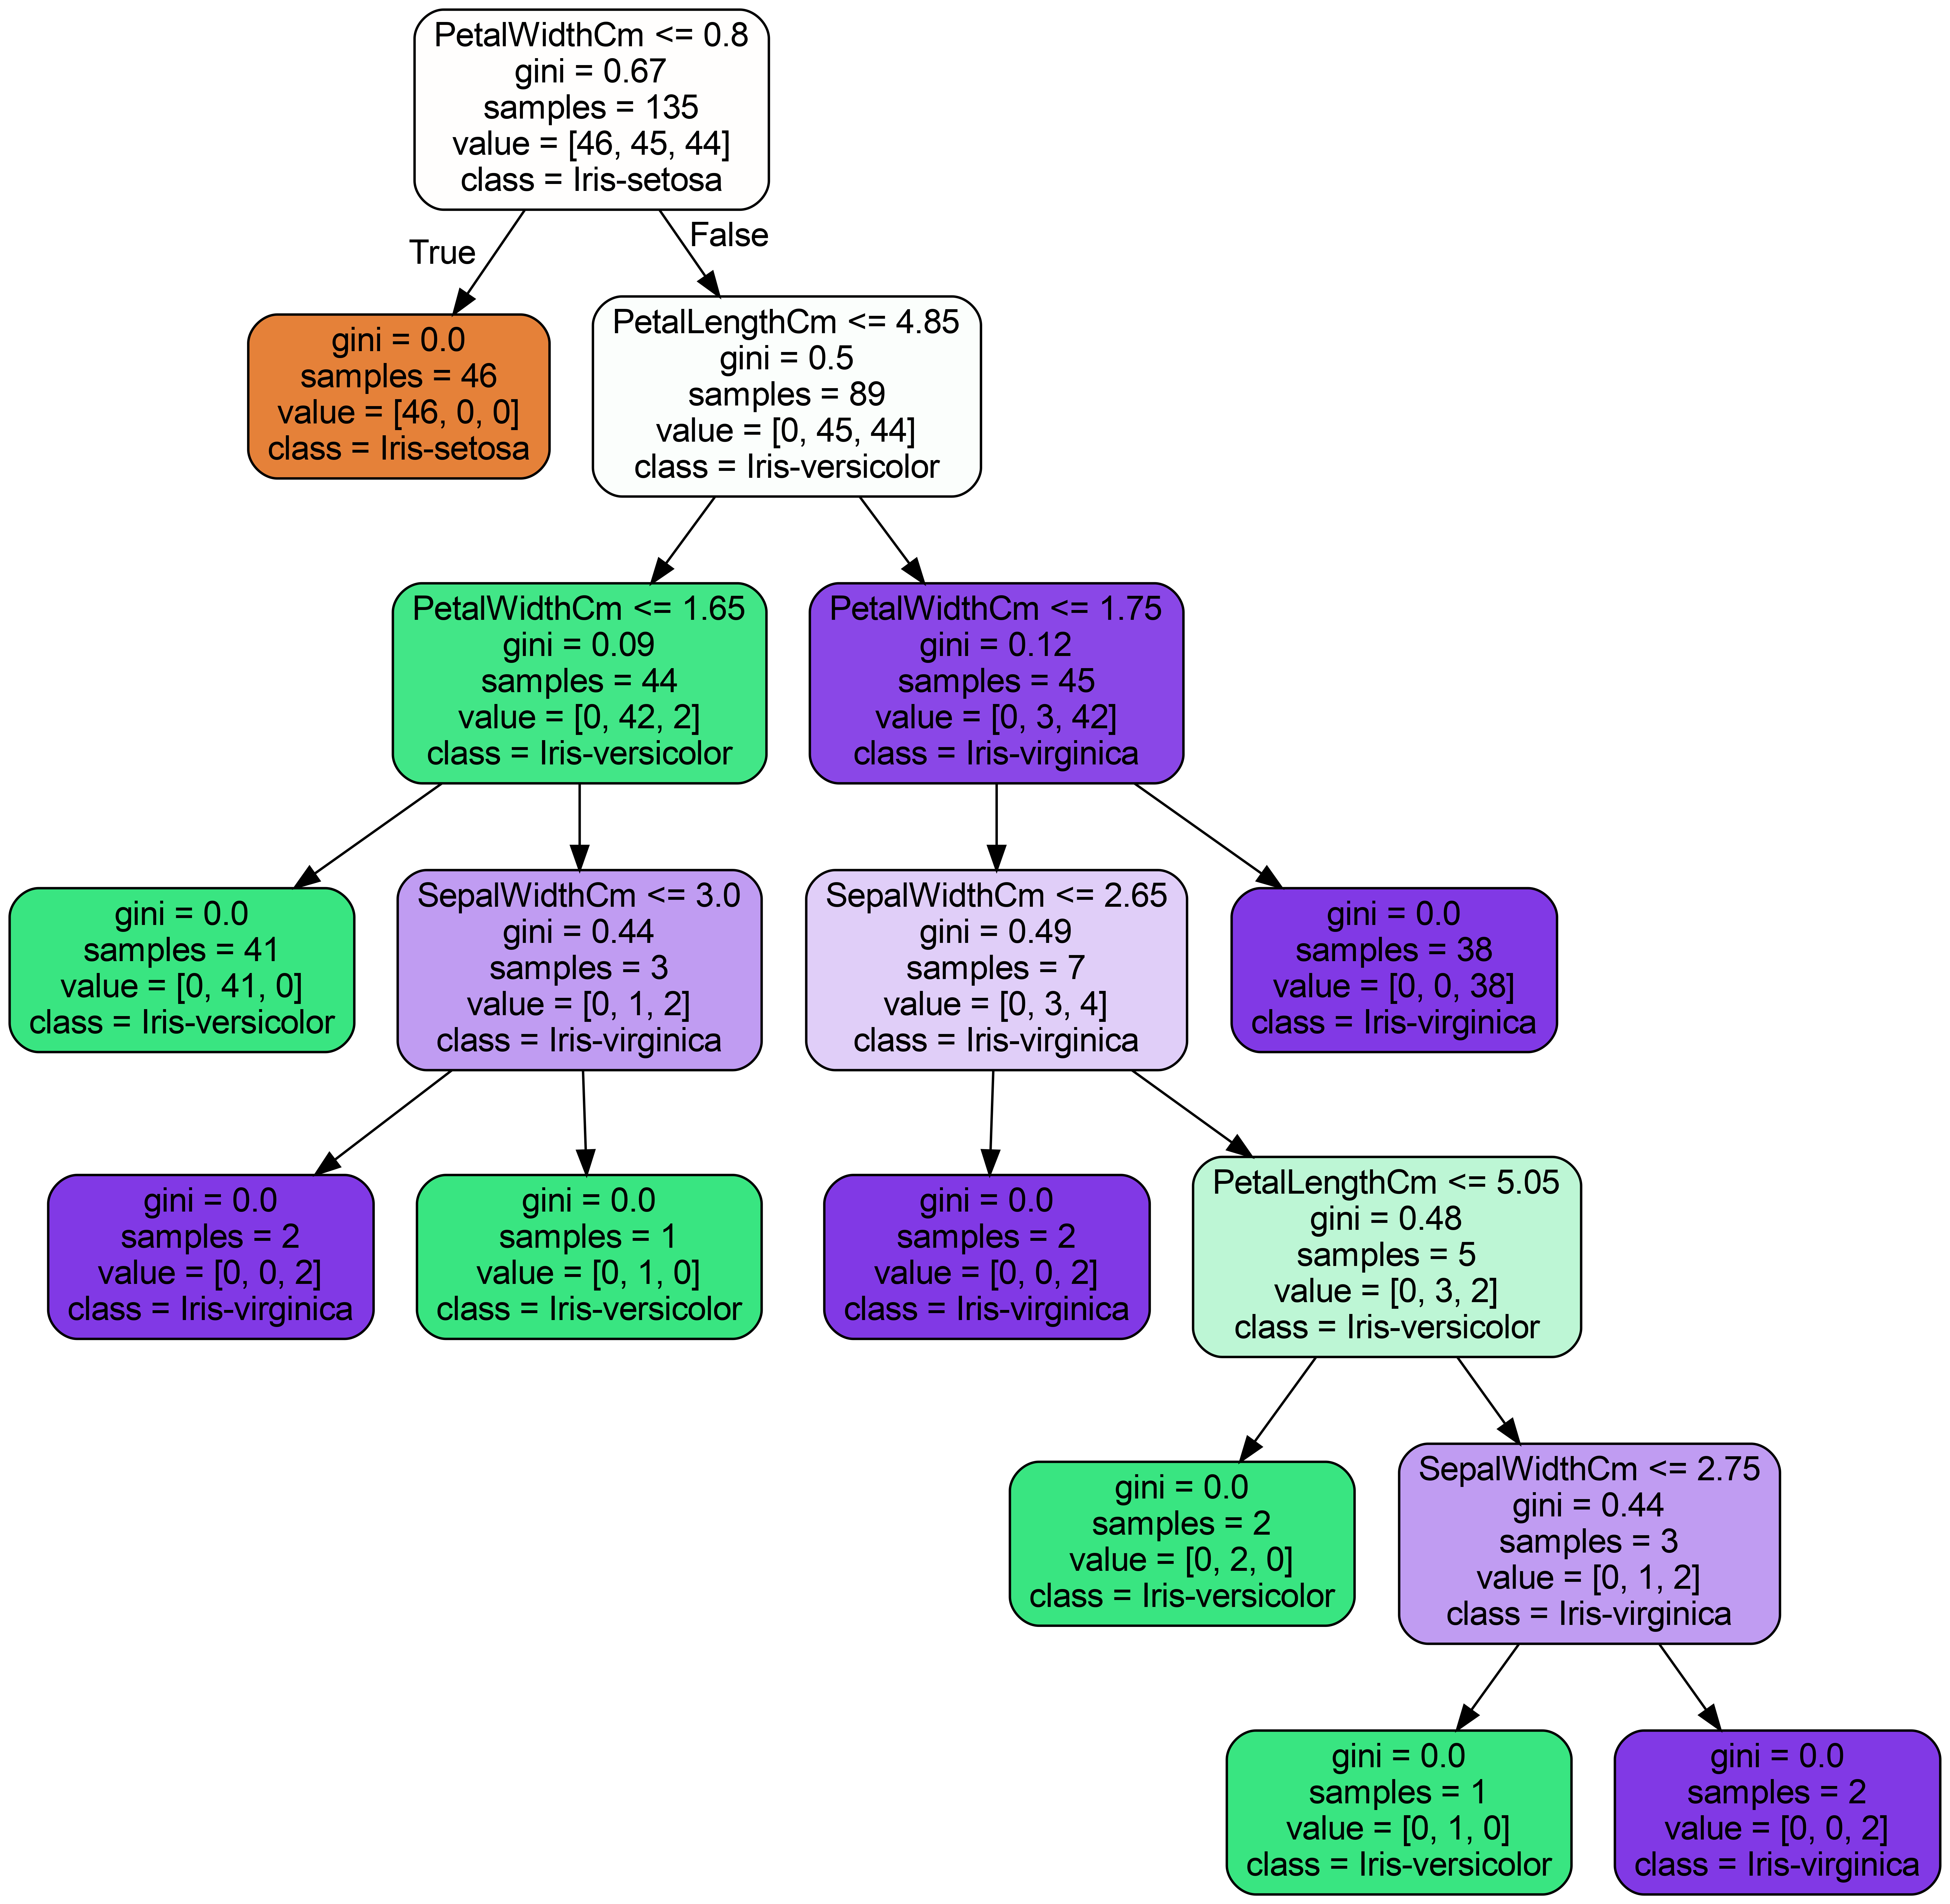

In [24]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'model/tree.png')